# 00. Getting Started

This is tutorial of integration GA4 BigQuery.

## Load Environment Variables

In [1]:
%pip install python-dotenv
%load_ext dotenv
%dotenv

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.getenv('GOOGLE_APPLICATION_CREDENTIALS')

'/Users/namikingsoft/Downloads/bigquery-service-account.json'

## Integrate BigQuery

https://cloud.google.com/bigquery/docs/visualize-jupyter

In [3]:
%pip install google-cloud-bigquery google-cloud-bigquery-storage pyarrow tqdm pandas
%load_ext google.cloud.bigquery

from google.cloud import bigquery
client = bigquery.Client()

Note: you may need to restart the kernel to use updated packages.


Using public ga4 sample dataset.  
https://developers.google.cn/analytics/bigquery/web-ecommerce-demo-dataset?hl=ja

In [4]:
%%bigquery event_counts
SELECT
  event_name,
  COUNT(event_name) AS count
FROM
  `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_*`
WHERE
  _TABLE_SUFFIX BETWEEN '20201101'
  AND '20210131'
GROUP BY
  event_name
LIMIT
  100

Downloading: 100%|██████████| 17/17 [00:01<00:00, 10.05rows/s]


In [5]:
event_counts

,event_name,count
0,view_promotion,190104
1,select_item,31007
2,view_item_list,71
3,user_engagement,1058721
4,session_start,354970
5,first_visit,257462
6,begin_checkout,38757
7,add_shipping_info,19722
8,click,1446
9,add_to_cart,58543


<AxesSubplot:ylabel='event_name'>

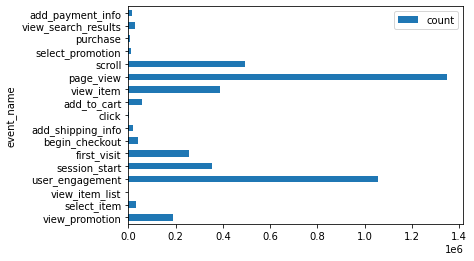

In [6]:
event_counts.plot.barh(x="event_name")